In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization, LSTM, CuDNNLSTM, MaxPooling2D
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

import numpy as np

train_dir = 'C:/Users/KIIT/Desktop/CODES/Project/images/train'
val_dir = 'C:/Users/KIIT/Desktop/CODES/Project/images/validation'


image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2
)    

training_set = image_generator.flow_from_directory(batch_size=256,
                                                 directory=train_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                )

testing_set = image_generator.flow_from_directory(batch_size=128,
                                                 directory=val_dir,
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                 )


training_set.class_indices

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [2]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = "adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [3]:
hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 5)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_13708\3028496548.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_set, validation_data = testing_set , epochs = 5)


Epoch 1/5
113/113 [==============================] - 905s 8s/step - loss: 6.7606 - accuracy: 0.2106 - val_loss: 3.6873 - val_accuracy: 0.2583
Epoch 2/5
113/113 [==============================] - 848s 8s/step - loss: 2.7758 - accuracy: 0.2664 - val_loss: 2.7702 - val_accuracy: 0.2583
Epoch 3/5
113/113 [==============================] - 1007s 9s/step - loss: 2.1908 - accuracy: 0.3633 - val_loss: 2.7838 - val_accuracy: 0.2584
Epoch 4/5
113/113 [==============================] - 878s 8s/step - loss: 2.1225 - accuracy: 0.4360 - val_loss: 2.6645 - val_accuracy: 0.1946
Epoch 5/5
113/113 [==============================] - 993s 9s/step - loss: 2.0922 - accuracy: 0.4715 - val_loss: 2.5764 - val_accuracy: 0.3149


In [4]:
hist = hist.history

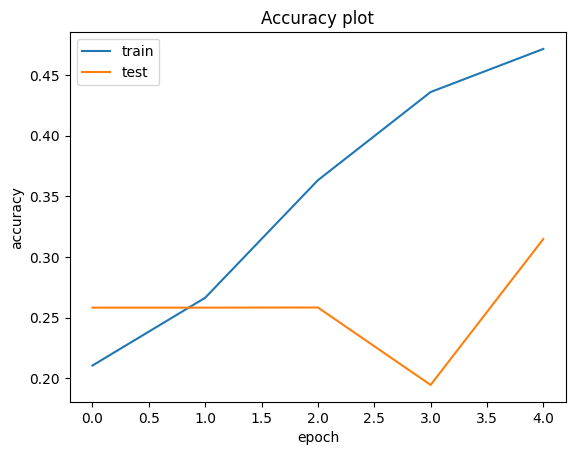

In [5]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("CNNv2_accuracy.png")

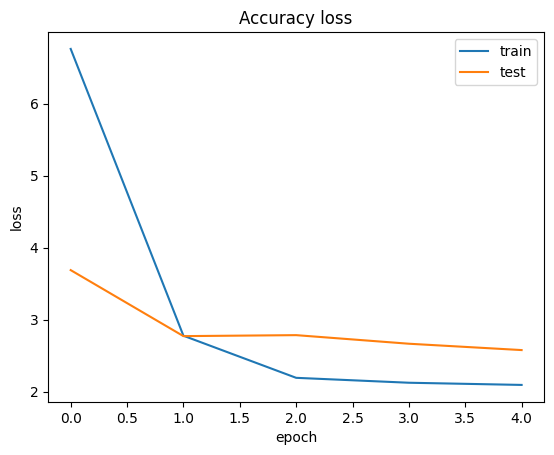

In [6]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("CNNv2_loss.png")

In [7]:
model.save("CNNv2.h5")

113/113 [==============================] - 228s 2s/step
Confusion Matrix
[[   6    0   17  661  253 3039   17]
 [   1    0    0   76   17  342    0]
 [   6    0   15  726  270 3071   15]
 [  10    0   25 1148  430 5520   31]
 [   6    0   15  838  259 3846   18]
 [  13    0   21  791  304 3786   23]
 [   4    0   12  543  190 2450    6]]
Classification Report
              precision    recall  f1-score   support

       angry       0.13      0.00      0.00      3993
     disgust       0.00      0.00      0.00       436
        fear       0.14      0.00      0.01      4103
       happy       0.24      0.16      0.19      7164
     neutral       0.15      0.05      0.08      4982
         sad       0.17      0.77      0.28      4938
    surprise       0.05      0.00      0.00      3205

    accuracy                           0.18     28821
   macro avg       0.13      0.14      0.08     28821
weighted avg       0.16      0.18      0.11     28821



c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

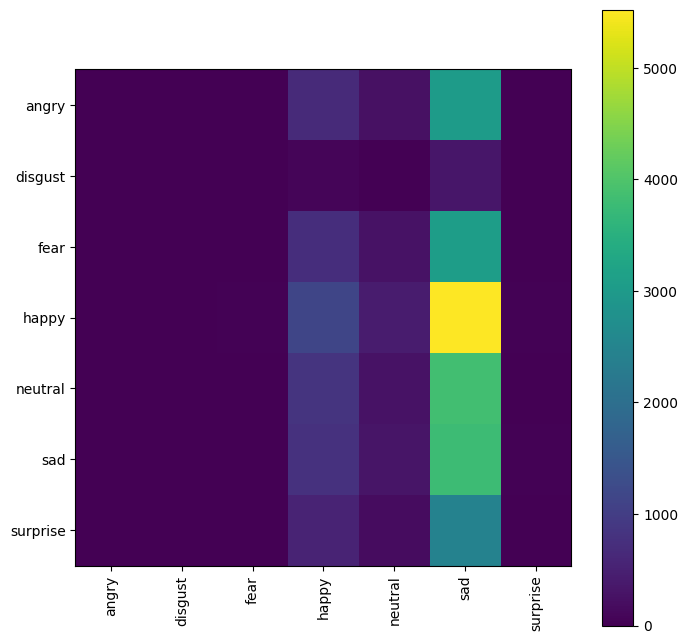

In [8]:
#Traning set matrix
y_pred = model.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = testing_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

56/56 [==============================] - 22s 389ms/step
Confusion Matrix
[[   2    0    6  162   50  734    6]
 [   0    0    0   14   12   85    0]
 [   1    0    3  196   68  742    8]
 [   4    0    7  321  107 1382    4]
 [   1    0    4  217   80  909    5]
 [   3    0    3  192   60  878    3]
 [   2    0    1  139   52  600    3]]
Classification Report
              precision    recall  f1-score   support

       angry       0.15      0.00      0.00       960
     disgust       0.00      0.00      0.00       111
        fear       0.12      0.00      0.01      1018
       happy       0.26      0.18      0.21      1825
     neutral       0.19      0.07      0.10      1216
         sad       0.16      0.77      0.27      1139
    surprise       0.10      0.00      0.01       797

    accuracy                           0.18      7066
   macro avg       0.14      0.15      0.09      7066
weighted avg       0.18      0.18      0.12      7066



c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

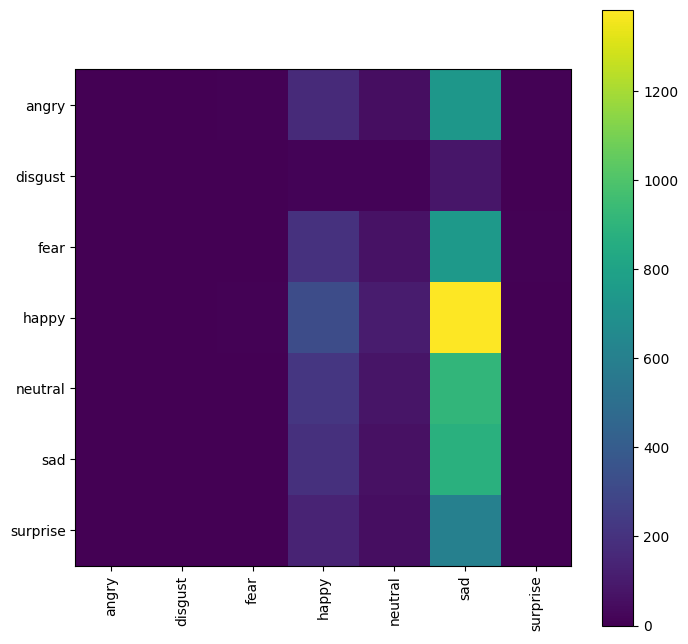

In [9]:
#TEST SET
y_pred = model.predict(testing_set)
y_pred = np.argmax(y_pred, axis=1)

cm_test = confusion_matrix(testing_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(testing_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)